In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score


In [2]:
def read_signal(signal_number):
    x = pd.read_csv('RS_data/signals/s'+signal_number+'.csv').T.values[::, ::].astype(float)
    return x

In [3]:
m = 35366
n = 50
a = pd.read_csv('RS_data/GT.csv')
a = a.T.values[::, ::].astype(float)
v = [0]*30
for i in range(1,31):
    z = read_signal(str(i))
    v[i-1] = z

X = np.zeros([m, n])
y = np.zeros([m, n])

k = 0
t = 0
for i in range(30):
    for j in range(0,v[i].shape[1], 5):
        if(j+n < v[i].shape[1]):
            X[k] = v[i][0][j:j+n]
            for t in range(j, j+n):
                for s in range(20):
                    if(s<20 and t==a[i][s]):
                        y[k][t-j] = 1      
            k = k+1

In [4]:
m = 0;
for i in range(30):
    m +=int((v[i].shape[1]-n)/5) + 1
print(m)

35369


In [ ]:
X[m-1]

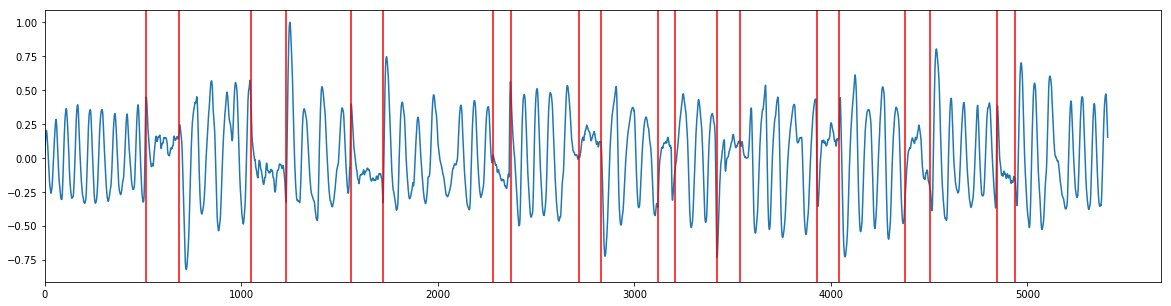

In [5]:
plt.figure(figsize=(20,5))
ax = plt.plot(v[0].T)
plt.xlim(xmin=0)
xcoords = a[0]
for xc in xcoords:
    plt.axvline(x=xc,color='red')

In [6]:
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras import regularizers
from keras import losses
from keras import optimizers

def constrainedCrossEntropy(ytrue, ypred):
  ypred = K.clip(ypred, 0.0001, 0.99999)
  return losses.categorical_crossentropy(ytrue, ypred)

Using TensorFlow backend.


In [7]:
K.clear_session()

model = Sequential()
model.add(Dense(500, input_dim=n, activation='relu',kernel_regularizer=regularizers.l2(0.00001), bias_regularizer=regularizers.l2(0.00001)))
model.add(Dense(n, activation='relu'))
optimizer = optimizers.Adam(clipnorm=1., clipvalue=0.5)
model.compile(loss=constrainedCrossEntropy, optimizer=optimizer)
history = model.fit(X, y, epochs=10, batch_size=5, verbose=1, shuffle=False)

Epoch 1/10
35366/35366 [==============================] - 9s 253us/step - loss: 0.5786
Epoch 2/10
35366/35366 [==============================] - 9s 250us/step - loss: 0.5713
Epoch 3/10
35366/35366 [==============================] - 9s 249us/step - loss: 0.5708
Epoch 4/10
35366/35366 [==============================] - 9s 249us/step - loss: 0.5708
Epoch 5/10
35366/35366 [==============================] - 9s 249us/step - loss: 0.5708
Epoch 6/10
35366/35366 [==============================] - 9s 248us/step - loss: 0.5708
Epoch 7/10
35366/35366 [==============================] - 9s 249us/step - loss: 0.5708
Epoch 8/10
35366/35366 [==============================] - 9s 247us/step - loss: 0.5708
Epoch 9/10
35366/35366 [==============================] - 9s 248us/step - loss: 0.5708
Epoch 10/10
35366/35366 [==============================] - 9s 248us/step - loss: 0.5708


In [8]:
y_pred = model.predict(X)


In [9]:
y_pred[94]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [10]:
# plt.figure(figsize=(5,5))
# ax = plt.plot(X[95].T)
# plt.xlim(xmin=0)
# # for xc in xcoords:
# #     plt.axvline(x=xc,color='red')
# for idx in range(y_pred[95].size):
#     if(y[95][idx] == 1):
#         plt.axvline(x=idx,color='black')
# plt.axvline(x=np.argmax(y_pred[95]),color='red')

/usr/lib/python3/dist-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


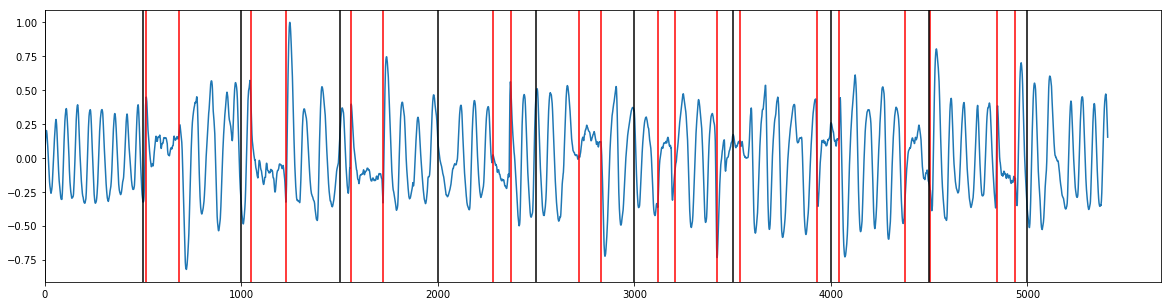

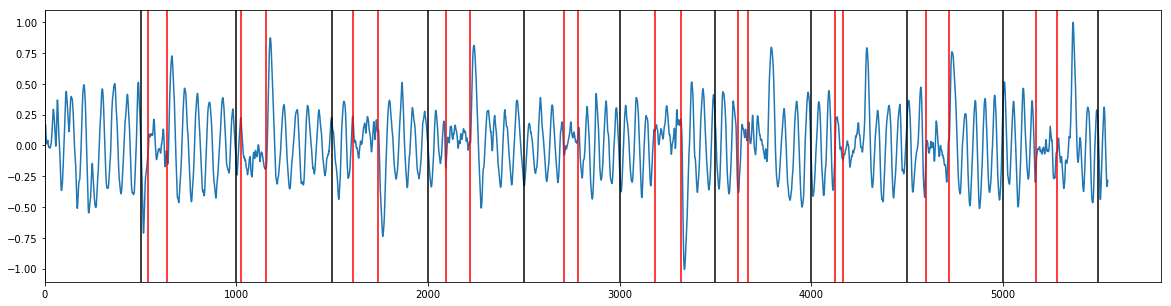

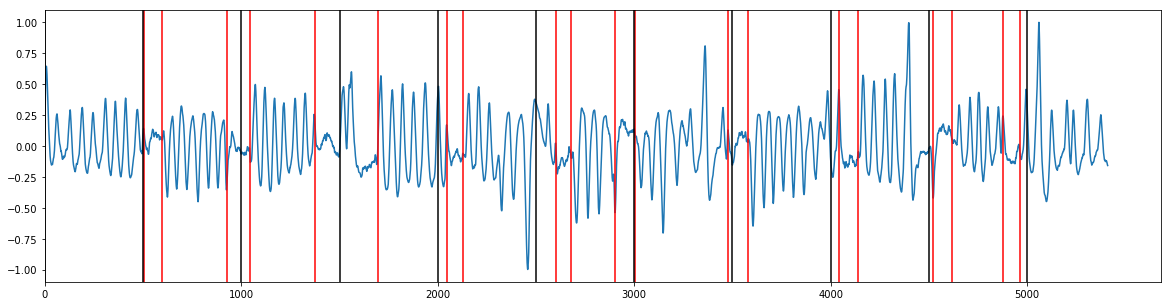

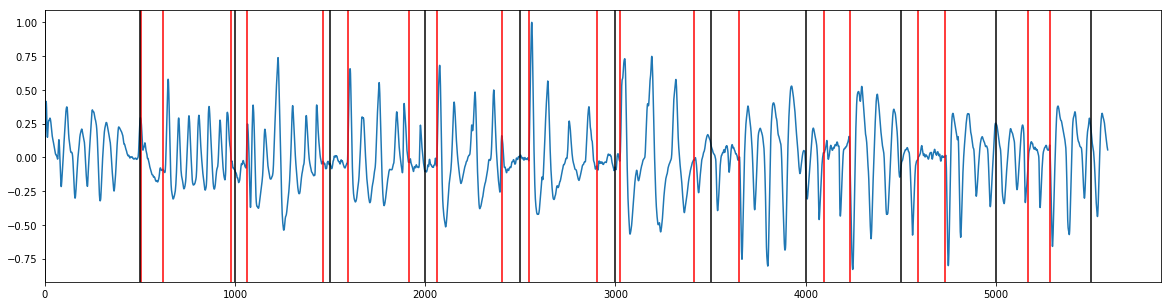

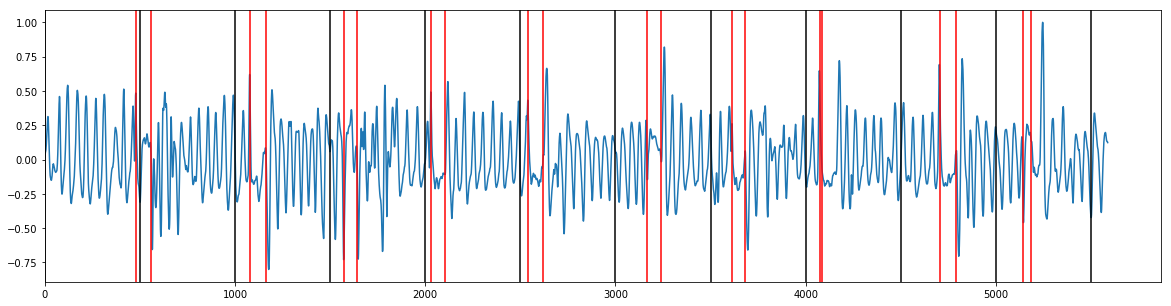

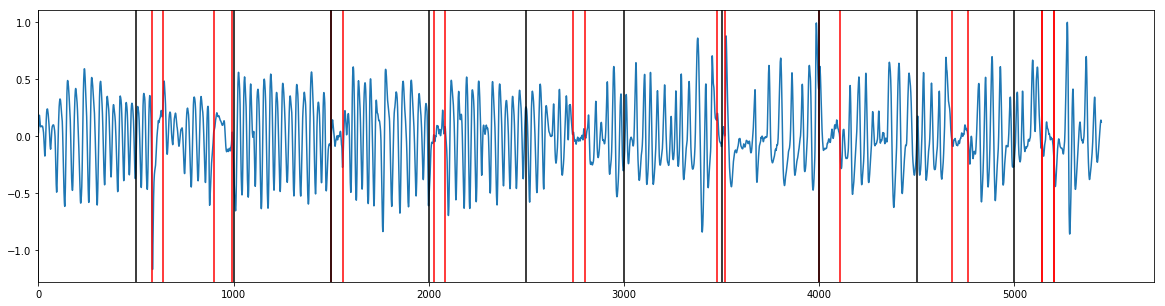

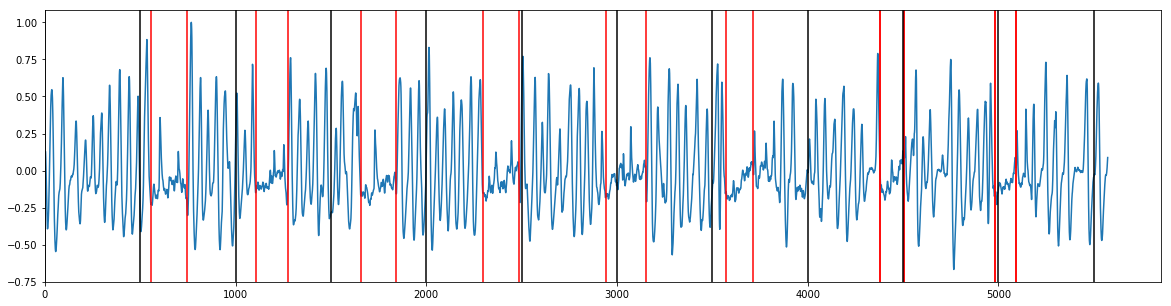

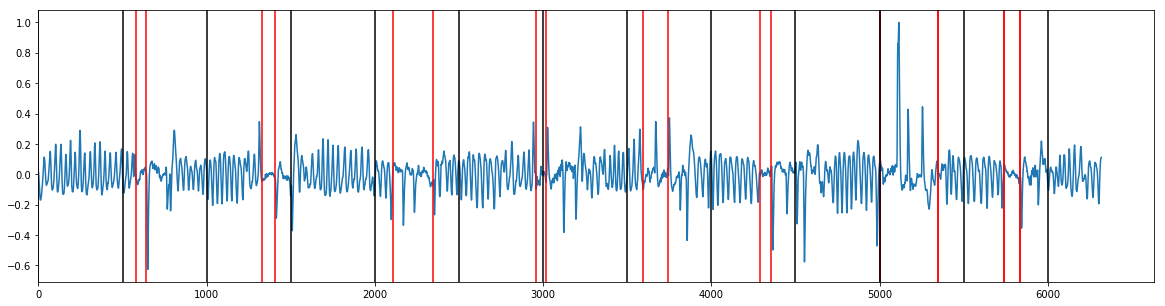

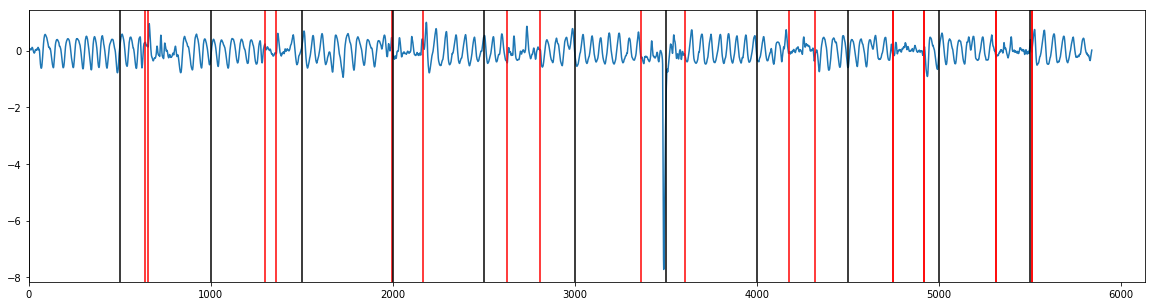

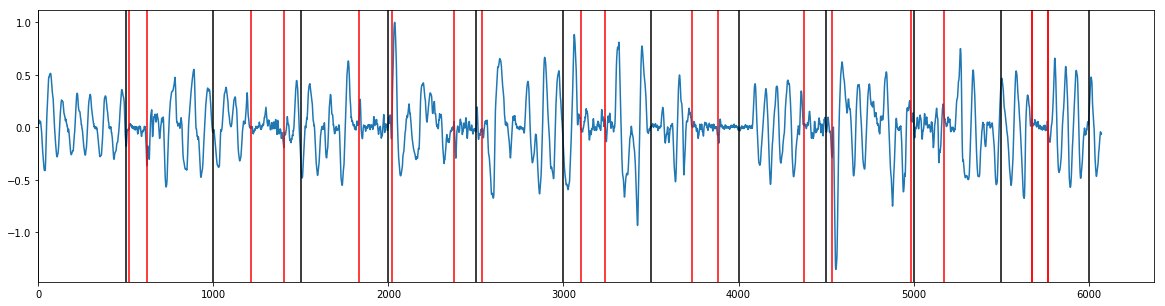

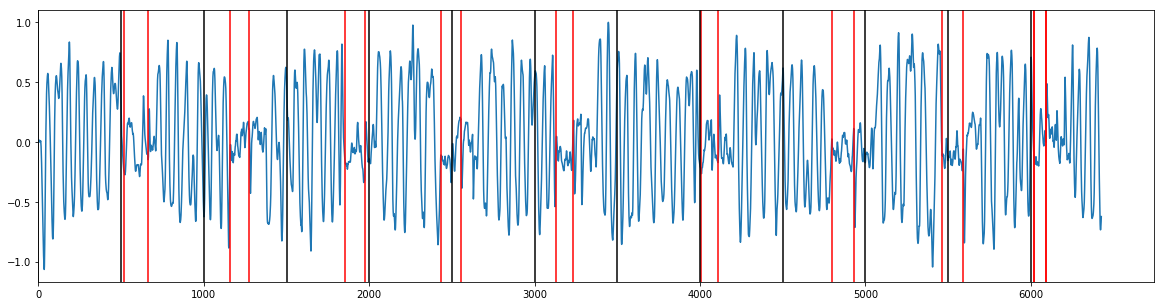

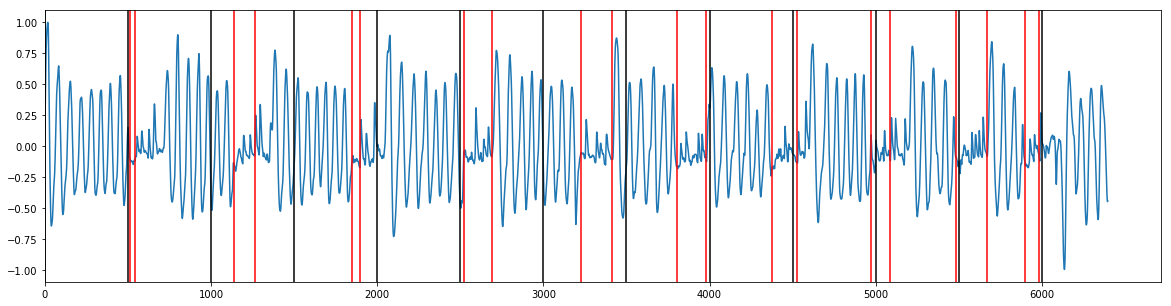

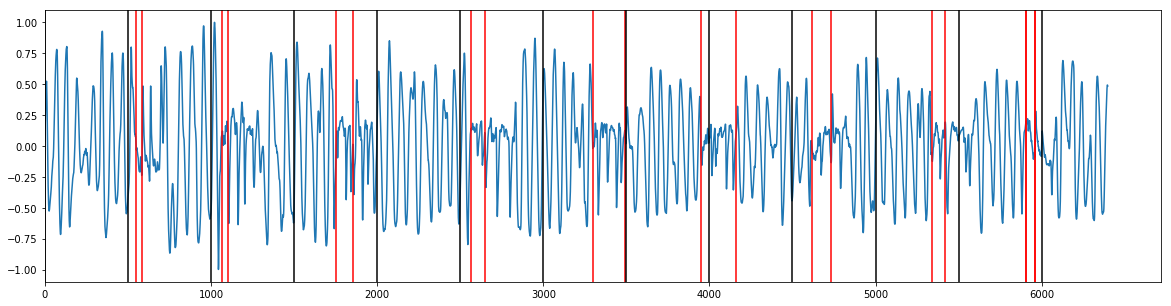

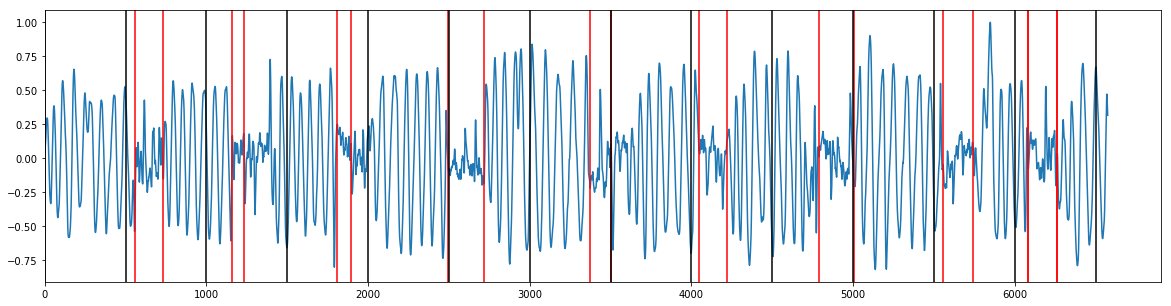

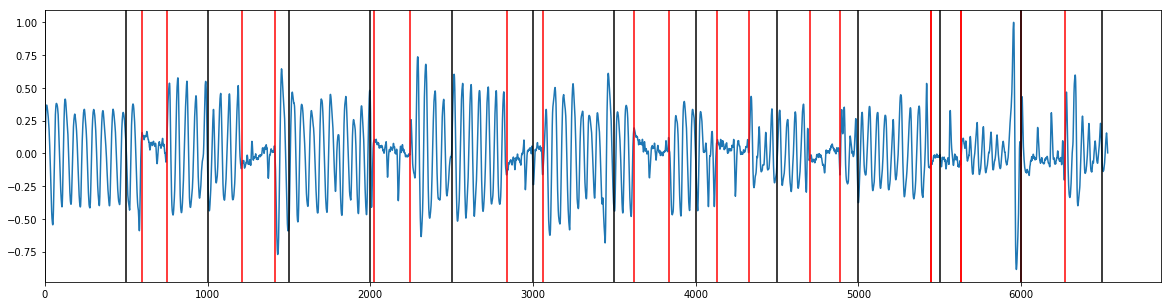

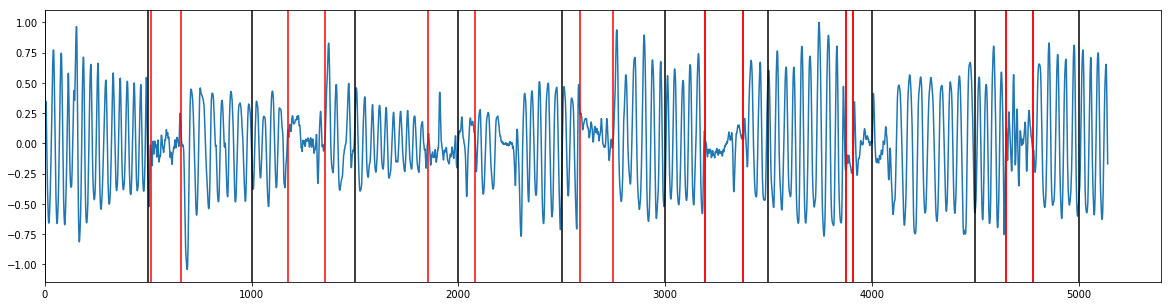

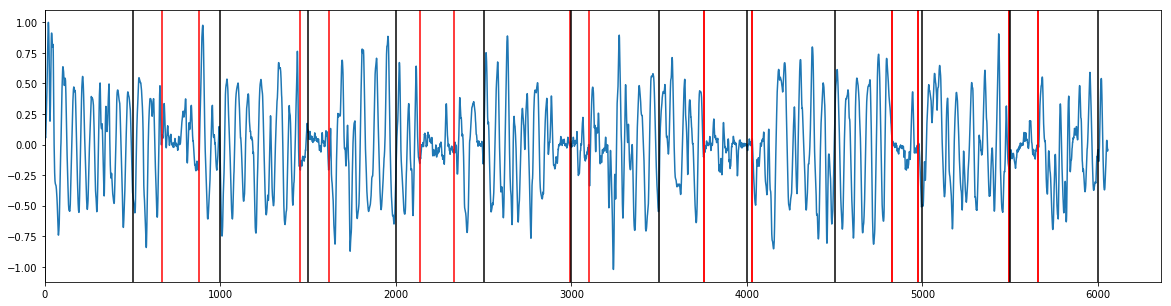

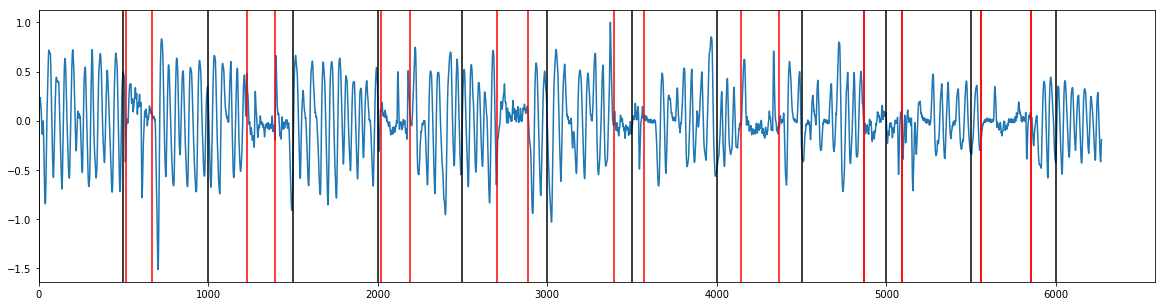

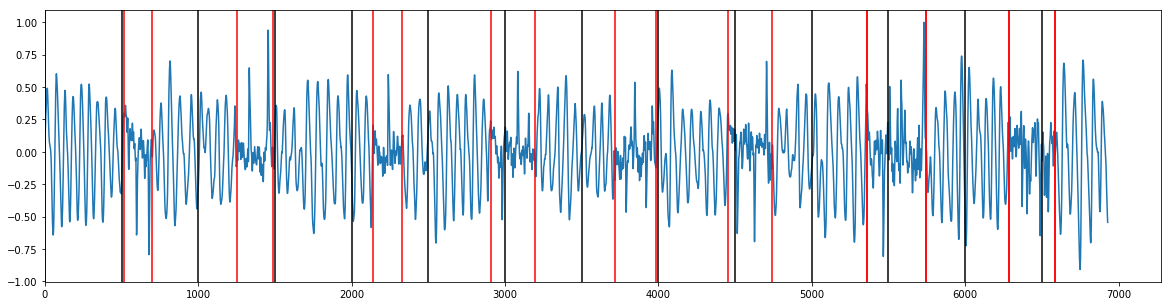

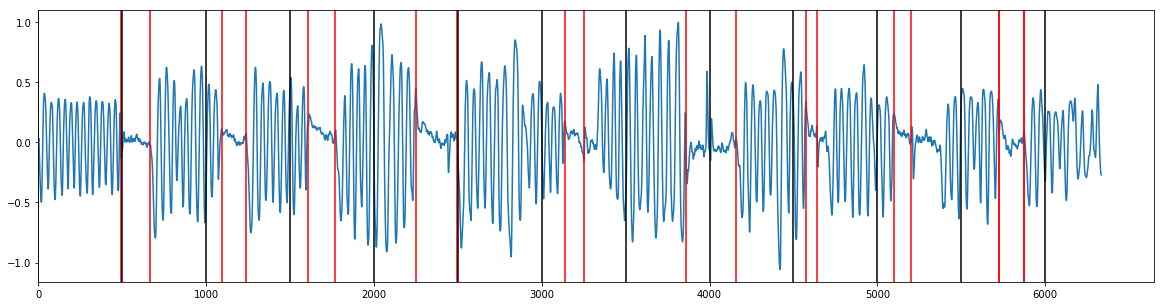

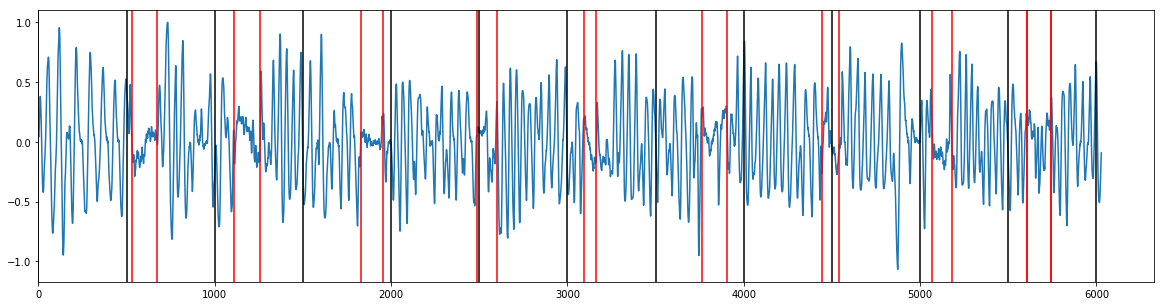

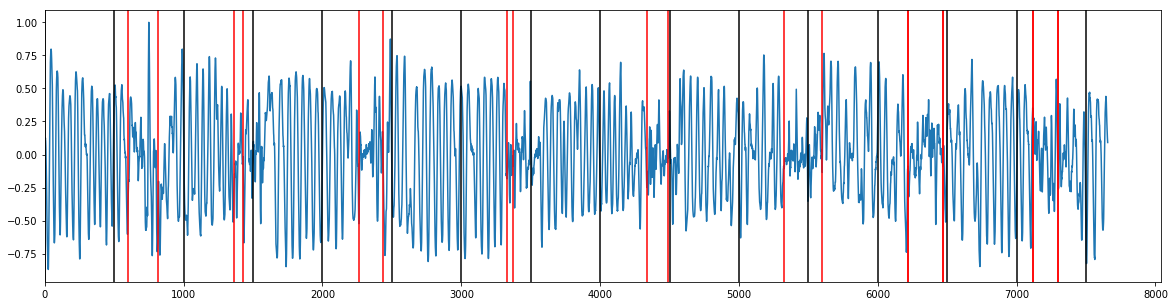

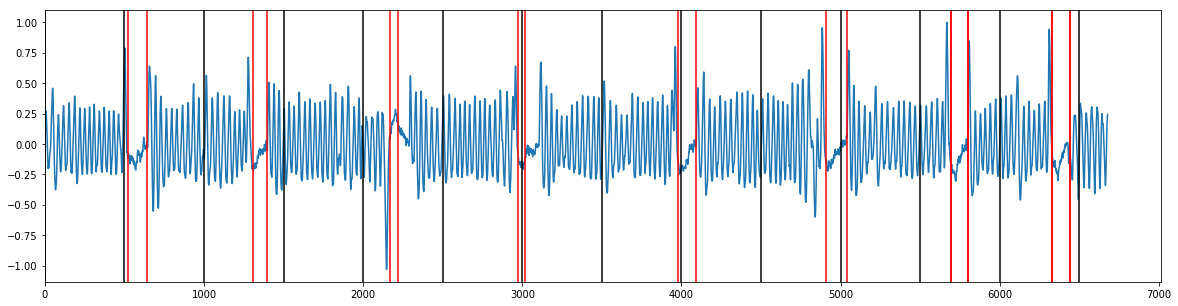

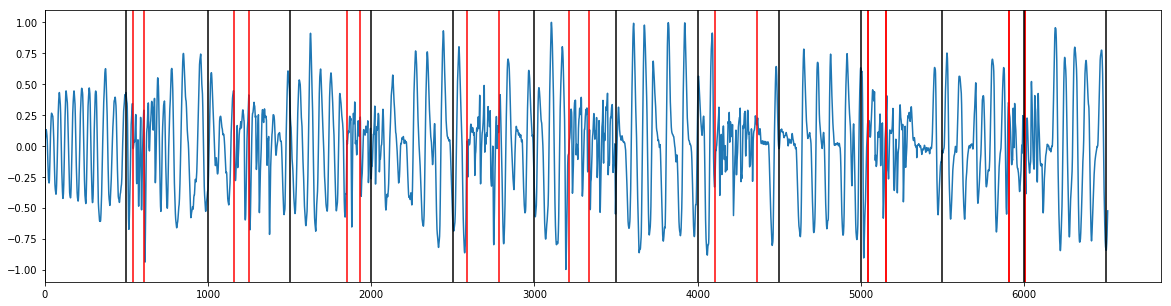

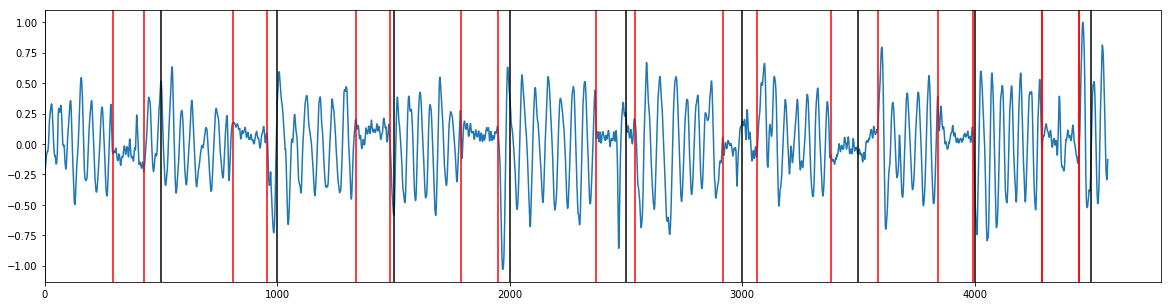

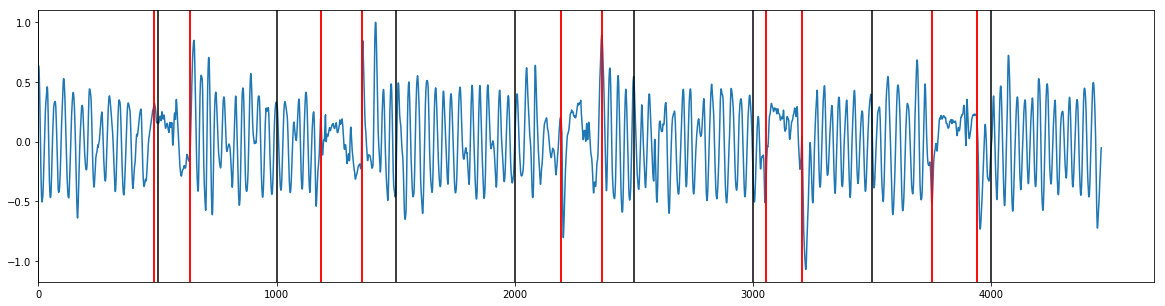

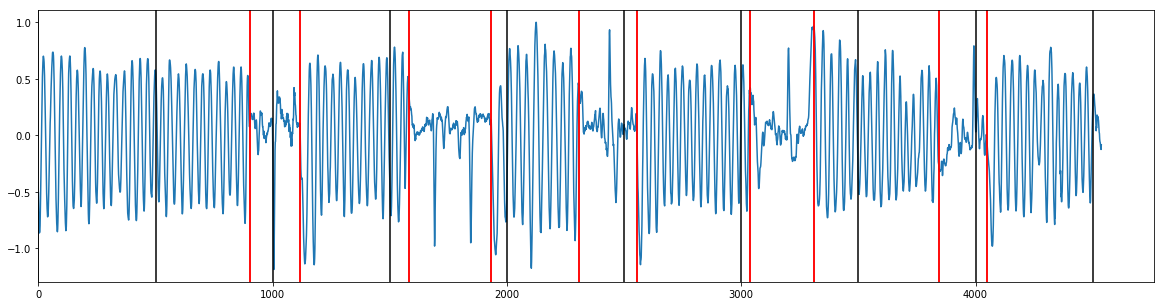

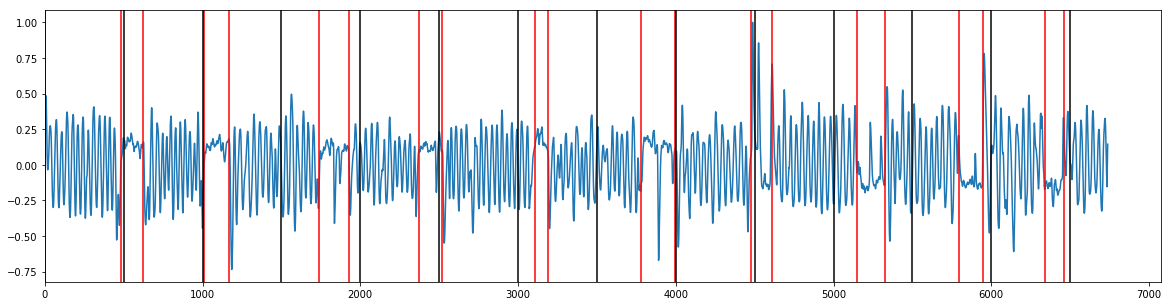

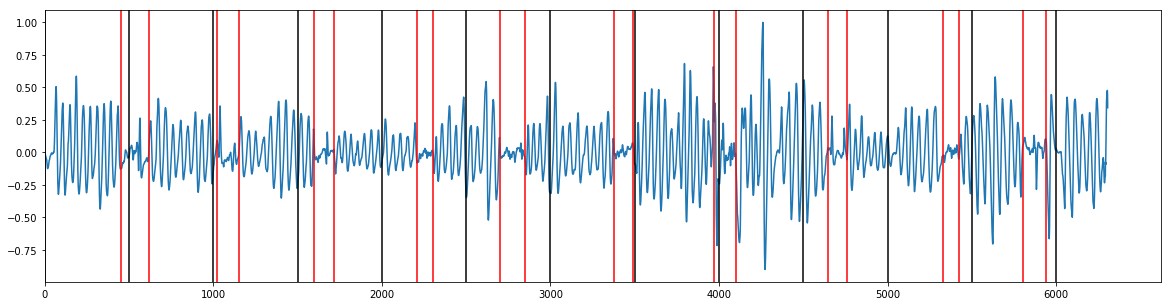

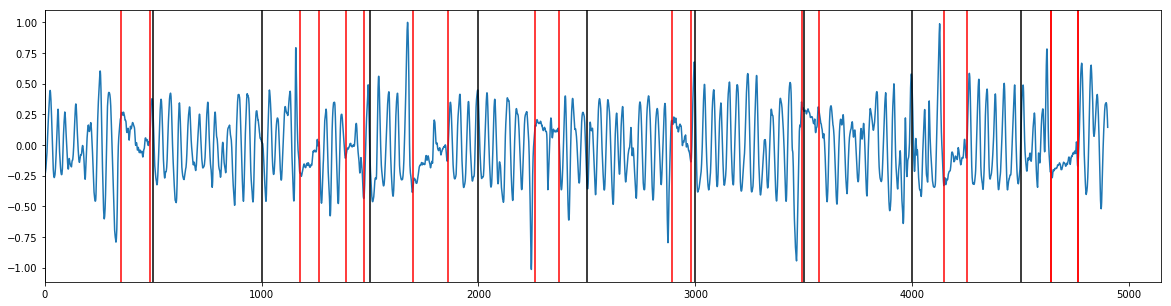

In [11]:
for k in range(30):
    plt.figure(figsize=(20,5))
    ax = plt.plot(v[k].T)
    plt.xlim(xmin=0)
    xcoords = a[k]
    for xc in xcoords:
        plt.axvline(x=xc,color='red')
    i = 0
    while(i*10 < v[k].shape[1]):
        s=0
        for j in range(0,50,10):
            s+=np.argmax(y_pred[i+j])
        s = s/5
        plt.axvline(x=s+i*10,color='black')
        i += 50